## Import libraries

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## import dataset

In [40]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    float64
 3   Name         888 non-null    object 
 4   Sex          888 non-null    int64  
 5   Age          715 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        887 non-null    float64
 8   Ticket       887 non-null    object 
 9   Fare         886 non-null    float64
 10  Embarked     886 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 76.4+ KB


In [41]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3.0,"Braund, Mr. Owen Harris",1,22.0,1,0.0,A/5 21171,7.25,1.0
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0.0,PC 17599,71.28,2.0
2,3,1,3.0,"Heikkinen, Miss. Laina",2,26.0,0,0.0,STON/O2. 3101282,7.92,1.0
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0.0,113803,53.10,1.0
4,5,0,3.0,"Allen, Mr. William Henry",1,35.0,0,0.0,373450,8.05,1.0


## Handling missing values with mean

In [25]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            1
Ticket           1
Fare             2
Embarked         2
dtype: int64

We can see that age, ticket, fare, cabin and embarked columns have missing values. 

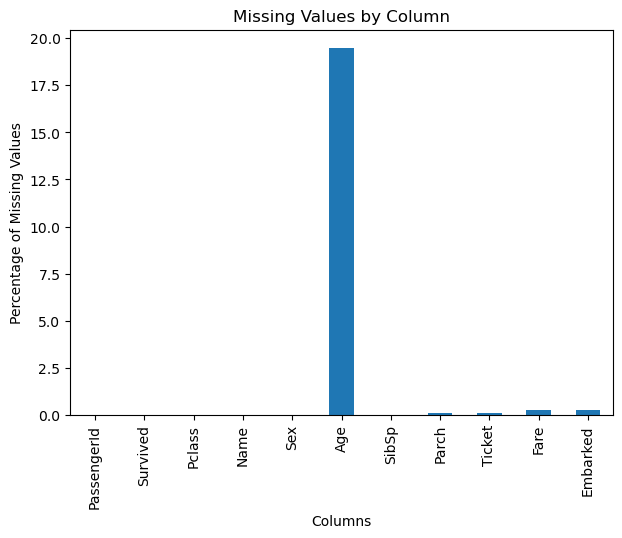

In [26]:
# Calculate the percentage of missing values for each column
missing_percentage = (df_titanic.isnull().sum() / len(df_titanic)) * 100

# Create a bar chart
plt.figure(figsize=(7, 5))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values by Column')
plt.show()

### Age column

In [27]:
df_titanic['Age'].mean()

36.00699300699301

In [28]:
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())
df_titanic['Age'].isna().sum()

0

### Parch column

In [29]:
df_titanic['Parch'].isna().sum()

1

In [30]:
df_titanic['Parch'] = df_titanic['Parch'].fillna(df_titanic['Parch'].mean())
df_titanic['Parch'].isna().sum()

0

### Ticket column


we will fill the missing value in ticket column with most frequent value.

In [31]:
df_titanic['Ticket'].isna().sum()

1

In [32]:
df_titanic['Ticket'].fillna(df_titanic['Ticket'].mode()[0], inplace = True)
df_titanic['Ticket'].isna().sum()

0

### Fare Column

In [33]:
df_titanic['Fare'].isna().sum()

2

In [34]:
df_titanic['Fare'] = df_titanic['Fare'].fillna(df_titanic['Fare'].mean())

### Embarked Column

In [35]:
df_titanic['Embarked'].isna().sum()

2

we will change the missing values with the most frequent values.

In [36]:
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace = True)
df_titanic['Embarked'].isna().sum()

0

Then, we will drop any columns that unnecessary for classification model.

In [37]:
df_titanic = df_titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df_titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3.0,1,22.0,1,0.0,7.25,1.0
1,1,1.0,2,38.0,1,0.0,71.28,2.0
2,1,3.0,2,26.0,0,0.0,7.92,1.0


In [38]:
# saving the dataframe
df_titanic.to_csv('titanic1_FMV_mean.csv', index=False)